'<!DOCTYPE html>\n<html lang="en" class="tag    cns-has-banner-top-size-initial">\n  <head>\n    <script>\n      window.copilot = window.copilot || {"tags":[]};\n    </script>\n    <link rel="dns-prefetch" href="https://pagead2.googlesyndication.com">\n    <link rel="dns-prefetch" href="https://www.bonappetit.com">\n    <link rel="dns-prefetch" href="https://cdnjs.cloudflare.com">\n    <link rel="dns-prefetch" href="https://assets.adobedtm.com">\n    <link rel="dns-prefetch" href="https://tpc.googlesyndication.com">\n    <link rel="dns-prefetch" href="https://z.moatads.com">\n    <link rel="dns-prefetch" href="https://assets.bonappetit.com">\n    <link rel="dns-prefetch" href="https://pixel.condenastdigital.com">\n    <link rel="dns-prefetch" href="https://condenast.demdex.net">\n    <link rel="dns-prefetch" href="https://capture.condenastdigital.com">\n    <link rel="alternate" type="application/rss+xml" title="Bon Appetit" href="/rss"/>\n    <meta charset="utf-8">\n    <meta http-equ
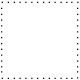
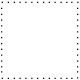
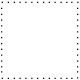
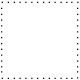
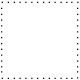
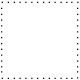

In [1]:
import requests

response = requests.get("https://www.bonappetit.com/ingredient/steak")

response.text

In [4]:
import bs4
soup = bs4.BeautifulSoup(response.text,'html.parser')

<!DOCTYPE html>

<html class="tag cns-has-banner-top-size-initial" lang="en">
<head>
<script>
      window.copilot = window.copilot || {"tags":[]};
    </script>
<link href="https://pagead2.googlesyndication.com" rel="dns-prefetch"/>
<link href="https://www.bonappetit.com" rel="dns-prefetch"/>
<link href="https://cdnjs.cloudflare.com" rel="dns-prefetch"/>
<link href="https://assets.adobedtm.com" rel="dns-prefetch"/>
<link href="https://tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="https://z.moatads.com" rel="dns-prefetch"/>
<link href="https://assets.bonappetit.com" rel="dns-prefetch"/>
<link href="https://pixel.condenastdigital.com" rel="dns-prefetch"/>
<link href="https://condenast.demdex.net" rel="dns-prefetch"/>
<link href="https://capture.condenastdigital.com" rel="dns-prefetch"/>
<link href="/rss" rel="alternate" title="Bon Appetit" type="application/rss+xml">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>Steak Recipes &amp; M
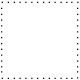
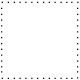
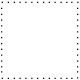
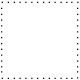
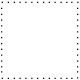
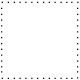

In [5]:
soup

In [15]:
thumbNails = soup.select(".ba-picture--fit")
len(thumbNails)

20

In [18]:
links = []
for link in thumbNails:
    #the links is in the 'src' attribute 
    item =link.get('srcset')
    #we're adding https: to format it properly 
    print(item)
    #this if statement is bc some <div> tags also have the class "thumbnail"
    if type(item) is str: 
        # print(type(item))
        links.append("https:"+item)

https://assets.bonappetit.com/photos/5c75aa590e14053d377dc535/1:1/w_285,c_limit/healthyish-weekenight-steamed-fish-horizontal.jpg 1x,https://assets.bonappetit.com/photos/5c75aa590e14053d377dc535/1:1/w_570,c_limit/healthyish-weekenight-steamed-fish-horizontal.jpg 2x
https://assets.bonappetit.com/photos/5f61053c08c362986c6eec16/1:1/w_285,c_limit/Popoca-Hanger-Steak-Chimol.jpg 1x,https://assets.bonappetit.com/photos/5f61053c08c362986c6eec16/1:1/w_570,c_limit/Popoca-Hanger-Steak-Chimol.jpg 2x
https://assets.bonappetit.com/photos/5f0c791fabafbe421929a9cb/1:1/w_285,c_limit/Thai-Beef-Salad-Recipe.jpg 1x,https://assets.bonappetit.com/photos/5f0c791fabafbe421929a9cb/1:1/w_570,c_limit/Thai-Beef-Salad-Recipe.jpg 2x
https://assets.bonappetit.com/photos/5ebf0515d7d33f245134596e/1:1/w_285,c_limit/Steak-Lacquered-Rib-Eye.jpg 1x,https://assets.bonappetit.com/photos/5ebf0515d7d33f245134596e/1:1/w_570,c_limit/Steak-Lacquered-Rib-Eye.jpg 2x
https://assets.bonappetit.com/photos/5ebf0518cc3f5a6f2266b2c7/1:

In [19]:
links

['https:https://assets.bonappetit.com/photos/5c75aa590e14053d377dc535/1:1/w_285,c_limit/healthyish-weekenight-steamed-fish-horizontal.jpg 1x,https://assets.bonappetit.com/photos/5c75aa590e14053d377dc535/1:1/w_570,c_limit/healthyish-weekenight-steamed-fish-horizontal.jpg 2x',
 'https:https://assets.bonappetit.com/photos/5f61053c08c362986c6eec16/1:1/w_285,c_limit/Popoca-Hanger-Steak-Chimol.jpg 1x,https://assets.bonappetit.com/photos/5f61053c08c362986c6eec16/1:1/w_570,c_limit/Popoca-Hanger-Steak-Chimol.jpg 2x',
 'https:https://assets.bonappetit.com/photos/5f0c791fabafbe421929a9cb/1:1/w_285,c_limit/Thai-Beef-Salad-Recipe.jpg 1x,https://assets.bonappetit.com/photos/5f0c791fabafbe421929a9cb/1:1/w_570,c_limit/Thai-Beef-Salad-Recipe.jpg 2x',
 'https:https://assets.bonappetit.com/photos/5ebf0515d7d33f245134596e/1:1/w_285,c_limit/Steak-Lacquered-Rib-Eye.jpg 1x,https://assets.bonappetit.com/photos/5ebf0515d7d33f245134596e/1:1/w_570,c_limit/Steak-Lacquered-Rib-Eye.jpg 2x',
 'https:https://assets.b

In [21]:
import urllib.request
import urllib.parse
from urllib.error import HTTPError
import time
import random as r

def download(url, full_path):
    try:
        urllib.request.urlretrieve(url, full_path)
        time.sleep(r.randint(1, 5))
    except urllib.error.HTTPError as err:
        print(err.code)
        pass
    
for index, url in enumerate(links):
    print(url)
    file_name = 'img_' + str(index) + '.jpg'
    file_path = 'images/'    
    full_path = '{}{}'.format(file_path, file_name)
    print(file_name)
    download(url, full_path)

https:https://assets.bonappetit.com/photos/5c75aa590e14053d377dc535/1:1/w_285,c_limit/healthyish-weekenight-steamed-fish-horizontal.jpg 1x,https://assets.bonappetit.com/photos/5c75aa590e14053d377dc535/1:1/w_570,c_limit/healthyish-weekenight-steamed-fish-horizontal.jpg 2x
img_0.jpg


URLError: <urlopen error no host given>